In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from sktime.forecasting.ets import AutoETS
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster
from sktime.utils.plotting import plot_series
from sktime.forecasting.structural import UnobservedComponents
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.ets import AutoETS
from math import *
import sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly 
from fbprophet.plot import add_changepoints_to_plot
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import joblib
# pycaret에서 나온 best들 
# 민수용. ETS/ Theta Forecaster, seasonal naive forecaster, arima, lgbm
# 산업용  ETS, theta forecaster, seasonal naive forecaster, arima, lgbm 
# 총합 : ETS/exponential smoothing, seasonal naive forecaster, lgbm, arima 

In [2]:
sub = pd.read_csv('~/Desktop/finalCopy/0_data/rawdata/kogas_dataset/submission_sample.csv')
df = pd.read_csv('~/Desktop/finalCopy/0_data/newdata/new_df_1122_00_kn48_gasoilrp.csv')
df.head()

,date,year,month,RP,GAS_PRICE,OIL_PRICE,도시가스_민수용,도시가스_산업용,도시가스_총합,민수용비중,...,명GDP성장율,명누적성장율,명GDP0.8성장율,명0.8누적성장율,QVA_origin,yearmonth,holirate,month3,cumhouse,kospi_float
0,1996-01-01,1996,1,0.97,26.94,27.86,605519.0,83809.0,689328.0,0.87842,...,11.0,11.0,11.0,11.0,36550.3,199601,0.322581,2,592132.0,878.82
1,1996-02-01,1996,2,0.93,26.94,29.04,566323.0,70427.0,636750.0,0.88940,...,11.0,11.0,11.0,11.0,36550.3,199602,0.344828,2,592132.0,852.83
2,1996-03-01,1996,3,0.96,26.94,27.99,477514.0,62652.0,540166.0,0.88401,...,11.0,11.0,11.0,11.0,36550.3,199603,0.354839,2,592132.0,874.16
3,1996-04-01,1996,4,0.94,26.94,28.74,337794.0,47050.0,384844.0,0.87774,...,11.0,11.0,11.0,11.0,37152.4,199604,0.300000,1,592132.0,980.90
4,1996-05-01,1996,5,0.92,26.94,29.18,184522.0,30709.0,215231.0,0.85732,...,11.0,11.0,11.0,11.0,37152.4,199605,0.290323,0,592132.0,903.09


In [3]:
print(df['GAS_PRICE'].mean(), df['OIL_PRICE'].mean(),df['RP'].mean()) 
#: 104.6550110461258 min: 73.45056560347507 max: 128.01640402403297
#mean: 149.78064853280642 min: 92.91490852706004 max: 192.62199110469922
#mean: 0.741819895633191 min: 0.5832954361320797 max: 1.0260800459681665
### 85.42780311057521 118.74897212288775 0.7566362018512305

85.42780311057521 118.74897212288775 0.7566362018512305


## 민수용 

In [4]:
#df['year']=pd.to_datetime(df['year'])
df1 = df.loc[48:299]

df1 = df1[['date','도시가스_민수용']] 
df1.columns=['ds','y']
last_1year = list()
for year in range(2021,2035):
    for i in range(1, 13):
        last_1year.append([f'{year}-%02d'%i])
last_1year = pd.DataFrame(last_1year, columns=['ds'])
last_1year['ds'] = pd.to_datetime(last_1year['ds'])

m5 = Prophet()
m5.fit(df1)
joblib.dump(m5, f'/home/kogas/Desktop/finalCopy/2_second_model/model_minsu1.pkl')

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -22.8619
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       650.906   0.000342686       45.6754     0.09198           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     124       651.001   9.27355e-05       51.5486   2.086e-06       0.001      192  LS failed, Hessian reset 
     160       651.022   7.69546e-05       59.5732   1.444e-06       0.001      277  LS failed, Hessian reset 
     192       651.024   4.91196e-06       59.7033   7.928e-08       0.001      379  LS failed, Hessian reset 
     199       651.025   7.55925e-07        58.114        1.46      0.5157      392   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     226       651.025   1.62075e-06       55.1162   2.484e-08       0.001      468  LS failed, Hessian reset 
     241       651.025   6.32656e-09       70.9027     0.06861   

['/home/kogas/Desktop/finalCopy/2_second_model/model_minsu1.pkl']

mean: 1005571.3524637601 min: 422311.19216471596 max: 1996733.8304347247


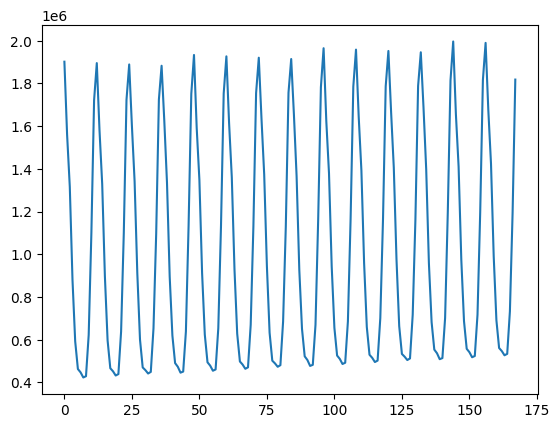

In [5]:
model = joblib.load(f'/home/kogas/Desktop/finalCopy/2_second_model/model_minsu1.pkl')
forecast_ms= model.predict(last_1year)
forecast_ms['yhat'].plot()
print("mean:", forecast_ms['yhat'].mean(), "min:", forecast_ms['yhat'].min(), "max:", forecast_ms['yhat'].max())

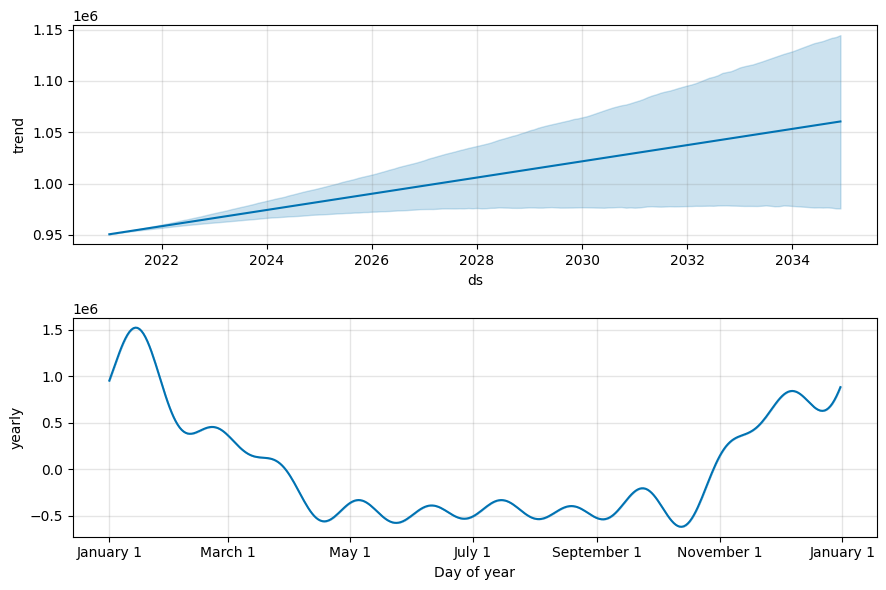

In [6]:
fig2 = m5.plot_components(forecast_ms)

In [32]:
df1 = df.loc[48:299]
df1['도시가스_총합'] = df1['도시가스_총합'].astype(int)
df1['도시가스_민수용'] = df1['도시가스_민수용'].astype(int)
test = df.loc[300:]
#test.loc[:,"RP"] = df['RP'][300:].values
test.rename(columns = {"누적성장율": "grownrate",'도시가스_민수용':'CIVIL'}, inplace = True)
df1.rename(columns = {"누적성장율": "grownrate",'도시가스_민수용':'CIVIL'}, inplace = True)
features = ['month3','QVA','holirate','GDP','temp_l_rcp6','temp_a_rcp6','kospi_float','GAS_PRICE','kospi_float','yearmonth']
train_x = df1[features]
train_y = df1['CIVIL']
test_x = test[features]

#그라디언트부스팅
model_gb = GradientBoostingRegressor(n_estimators=300,
                                     min_samples_split=2,
                                     min_samples_leaf=2,
                                     max_features = 'sqrt',
                                     max_depth = 5,
                                     random_state=42)

model_gb.fit(train_x, train_y)

GradientBoostingRegressor(max_depth=5, max_features='sqrt', min_samples_leaf=2,
                          n_estimators=300, random_state=42)

<AxesSubplot: >

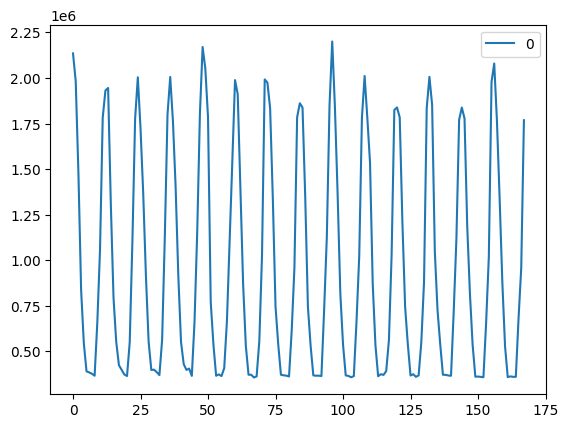

In [33]:
pred_gb = model_gb.predict(test_x)
pd.DataFrame(pred_gb).plot()

In [18]:
joblib.dump(model_gb, f'/home/kogas/Desktop/finalCopy/2_second_model/model_minsu2_b10.pkl')
model_gb = joblib.load(f'/home/kogas/Desktop/finalCopy/2_second_model/model_minsu2_b10.pkl')

In [34]:
pred_gb = model_gb.predict(test_x)
print(f'최소: {pred_gb.min()}')
print(f'평균: {pred_gb.mean()}')
print(f'최대: {pred_gb.max()}')
# kn best 최소: 394105.9090110542 , 평균: 986655.205172873, 최대: 2106485.0909167086

최소: 357086.68705296464
평균: 962855.2083753202
최대: 2200014.1169369533


<AxesSubplot: >

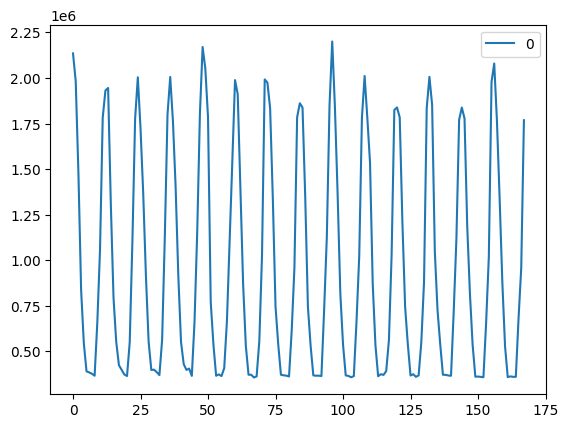

In [35]:
pd.DataFrame(pred_gb).plot()

In [24]:
# sub['CIVIL']= forecast_ms['yhat'].values*0.8+pred_gb*0.2
# print("mean:", sub['CIVIL'].mean(), "min:", sub['CIVIL'].min(), "max:", sub['CIVIL'].max())
# # mean: 1001836.3232579895 min: 423489.5568286157 max: 1981190.7049889646

In [25]:
first = pd.DataFrame(df['도시가스_민수용'][:300])
first.rename(columns={'도시가스_민수용':"CIVIL"}, inplace=True)
                     
full_graph = pd.concat([first,pd.DataFrame(sub['CIVIL'])], axis=0)
full_graph.reset_index(drop=True, inplace=True) 

<AxesSubplot: >

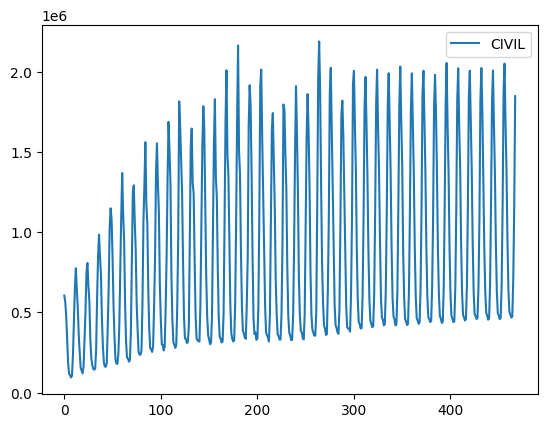

In [26]:
full_graph.plot()

mean: 1041013.9242930219 min: 357095.27776558493 max: 2300893.917223085


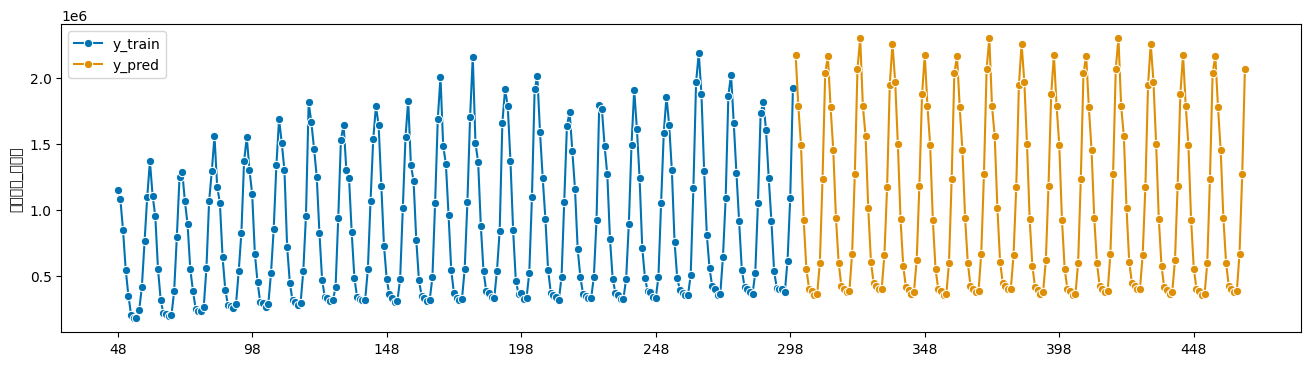

In [27]:
df1 = df.loc[48:299]
y = df1['도시가스_민수용'] 
fh=list(range(1,169))
AETS = AutoETS(auto=True, sp=48, n_jobs=-1,allow_multiplicative_trend=True)
AETS.fit(y)
y_pred3 = AETS.predict(fh)
plot_series(y, y_pred3, labels=["y_train",  "y_pred"])
print("mean:",y_pred3.mean(), "min:",y_pred3.min(), "max:",y_pred3.max())

In [36]:
sub['CIVIL'] = forecast_ms['yhat'].values*0.6+pred_gb*0.2+y_pred3.values*0.2
print("mean:", sub['CIVIL'].mean(), "min:", sub['CIVIL'].min(), "max:", sub['CIVIL'].max())

mean: 1004116.6380119249 min: 400282.33117678494 max: 2054525.6299672518


In [35]:
#sub['CIVIL']= forecast_ms['yhat'].values*0.7+pred_gb*0.2+y_pred3.values*0.1
#print("mean:", sub['CIVIL'].mean(), "min:", sub['CIVIL'].min(), "max:", sub['CIVIL'].max())

mean: 993412.3942401896 min: 407153.6963371409 max: 2016965.6766097033


<AxesSubplot: >

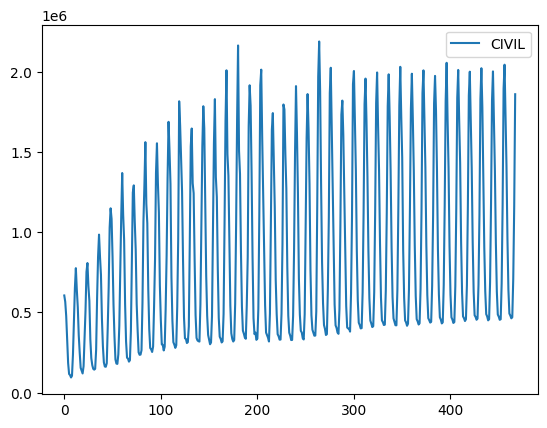

In [37]:
first = pd.DataFrame(df['도시가스_민수용'][:300])
first.rename(columns={'도시가스_민수용':"CIVIL"}, inplace=True)
                     
full_graph = pd.concat([first,pd.DataFrame(sub['CIVIL'])], axis=0)
full_graph.reset_index(drop=True, inplace=True) 
full_graph.plot()

# 산업용
* 현재 best 모델에 RP, GAS_PRICE, OIP_PRICE 등 갈아끼워보기
* Exponential smoothing _sp=48 *0.8 , 현재 best

In [55]:
df = pd.read_csv('~/Desktop/finalCopy/0_data/newdata/new_df_1122_00_kn48_gasoilrp.csv')
#df1['year']=pd.to_datetime(df1['year'])
#df1 = df.loc[48:299]
df1 = df.loc[:299]
#df1['도시가스_총합'] = df1['도시가스_총합'].astype(int)
#df1['도시가스_민수용'] = df1['도시가스_민수용'].astype(int)
df1['도시가스_산업용'] = df1['도시가스_산업용'].astype(int)
fh = list(range(1,169))

mean: 841821.4623611314 528199.3908484116 1362622.748228815
# best 조합
forecaster = ExponentialSmoothing(trend='add', seasonal='multiplicative', sp=48)  

In [56]:
y = df1['도시가스_산업용'] 
ES = ExponentialSmoothing(trend='add', seasonal='multiplicative', sp=48)   #,smoothing_level=1
# multiplicative / additive
ES.fit(y)
ExponentialSmoothing(...)



ExponentialSmoothing(trend=Ellipsis)

In [57]:
#모델 저장 및 로드 
joblib.dump(ES, f'/home/kogas/Desktop/finalCopy/2_second_model/model_san1.pkl')

['/home/kogas/Desktop/finalCopy/2_second_model/model_san1.pkl']

mean: 841023.1123528046 min: 499594.8352278117 max: 1430462.8580230735


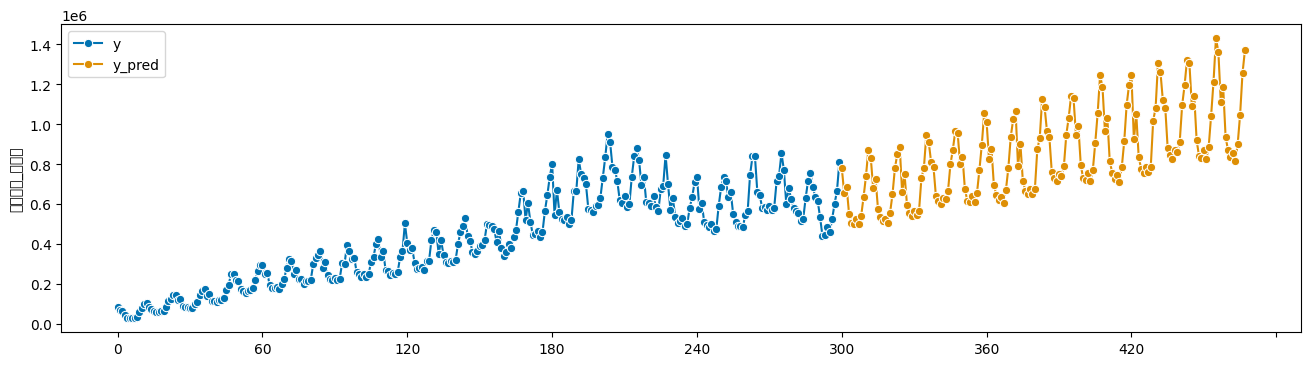

In [58]:

forecaster = joblib.load(f'/home/kogas/Desktop/finalCopy/2_second_model/model_san1.pkl')

y_pred = forecaster.predict(fh)
plot_series(y, y_pred, labels=["y", "y_pred"])
print("mean:",y_pred.mean(), "min:",y_pred.min(), "max:",y_pred.max())
#mean: 841023.1123528046 min: 499594.8352278117 max: 1430462.8580230735

## multi_prophet 

In [59]:
df1["value"] = df1["도시가스_산업용"]
df1 = df1[:300]
list(map(lambda x:x.split('-')[0]+x.split('-')[1],df['date']))
df1 = df1[['date','value','yearmonth','QUARTER','kospi_float', 'OIL_PRICE','GDP','temp_h_rcp6', 'QVA','holirate','RP']] 
train_df = df1.copy()
#date,value 포함 그 외 피처 알아서
y_train_prophet_df = train_df[['date','value']]
y_train_prophet_df.columns = ['ds', 'y']
y_train_prophet_df.head()

x_col = [i for i in train_df.columns if i not in ['date','value']] 
x_train_prophet_df = train_df[x_col] 
x_train_prophet_df.head()

,yearmonth,QUARTER,kospi_float,OIL_PRICE,GDP,temp_h_rcp6,QVA,holirate,RP
0,199601,1,878.82,27.86,490850.9,2.3,36550.3,0.322581,0.97
1,199602,1,852.83,29.04,490850.9,3.2,36550.3,0.344828,0.93
2,199603,1,874.16,27.99,490850.9,9.5,36550.3,0.354839,0.96
3,199604,2,980.90,28.74,490850.9,15.1,37152.4,0.300000,0.94
4,199605,2,903.09,29.18,490850.9,24.2,37152.4,0.290323,0.92


 param_grid = {  
'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
'seasonality_mode': ['multiplicative', 'additive'],
'growth': ['linear', 'logistic'],
'yearly_seasonality':[5,10,20,40],
'weekly_seasonality':[5,10,20,40],
'daily_seasonality':[5,10,20,40],
}

# best 조합
m = Prophet(seasonality_mode='additive', n_changepoints=10, mcmc_samples=300, changepoint_prior_scale=0.025, yearly_seasonality='auto',changepoint_range=0.5).fit(yx_train_prophet_df)  #, sh

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 136)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 136)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler i




Gradient evaluation took 0.000515 seconds
Gradient evaluation took 0.000515 seconds
Gradient evaluation took 0.000515 seconds
1000 transitions using 10 leapfrog steps per transition would take 5.15 seconds.
1000 transitions using 10 leapfrog steps per transition would take 5.15 seconds.
1000 transitions using 10 leapfrog steps per transition would take 5.15 seconds.
Adjust your expectations accordingly!
Adjust your expectations accordingly!
Adjust your expectations accordingly!







Gradient evaluation took 0.000518 seconds
1000 transitions using 10 leapfrog steps per transition would take 5.18 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 300 [  0%]  (Warmup)
Iteration:   1 / 300 [  0%]  (Warmup)
Iteration:   1 / 300 [  0%]  (Warmup)
Iteration:   1 / 300 [  0%]  (Warmup)
Iteration:  30 / 300 [ 10%]  (Warmup)
Iteration:  30 / 300 [ 10%]  (Warmup)
Iteration:  30 / 300 [ 10%]  (Warmup)
Iteration:  30 / 300 [ 10%]  (Warmup)
Iteration:  60 / 300 [ 20%]  (Warmup)
It

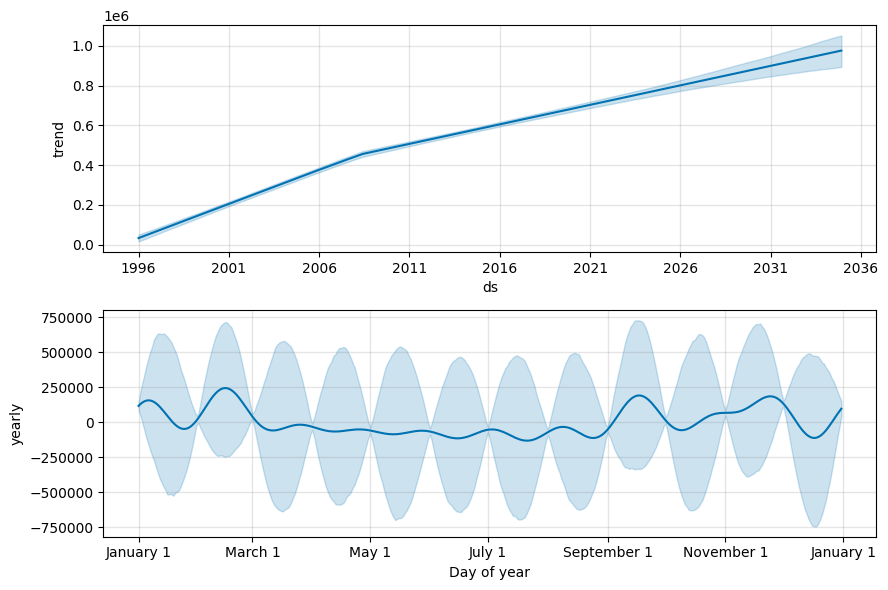

In [60]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()
#scaler.fit(x_train_prophet_df[['kospi_float', 'OIL_PRICE', 'people', 'GDP', 'QVA_origin']])  
scaler.fit(x_train_prophet_df[['kospi_float', 'OIL_PRICE','GDP','temp_h_rcp6', 'QVA','holirate','RP']]) 

trans_colum = scaler.transform(x_train_prophet_df[['kospi_float', 'OIL_PRICE', 'GDP', 'temp_h_rcp6', 'QVA','holirate','RP']])  ### best는 'kospi_float', 'OIL_PRICE', 'people', 'GDP', 'QVA_origin' (아마 QVA_origin은 안들어간듯) 

x_train_prophet_df['kospi_float'] = [trans_colum[i][0] for i in range(len(trans_colum))]
x_train_prophet_df['OIL_PRICE'] = [trans_colum[i][1] for i in range(len(trans_colum))]
x_train_prophet_df['GDP'] = [trans_colum[i][2] for i in range(len(trans_colum))]
x_train_prophet_df['temp_h_rcp6'] = [trans_colum[i][3] for i in range(len(trans_colum))]
x_train_prophet_df['QVA'] = [trans_colum[i][4] for i in range(len(trans_colum))]
x_train_prophet_df['holirate'] = [trans_colum[i][5] for i in range(len(trans_colum))]
x_train_prophet_df['RP'] = [trans_colum[i][6] for i in range(len(trans_colum))]
yx_train_prophet_df = pd.concat([y_train_prophet_df, x_train_prophet_df],axis = 1)

m = Prophet(seasonality_mode='additive', n_changepoints=10, mcmc_samples=300, changepoint_prior_scale=0.025, yearly_seasonality='auto',changepoint_range=0.5).fit(yx_train_prophet_df)  #, show_progress=False) #0.001
# 여기 수정
future = m.make_future_dataframe(periods=168, freq='MS')
fcst = m.predict(future)
fig = m.plot_components(fcst)

In [61]:
# 모델 저장(score:134,303)
import pickle
pkl_path = "/home/kogas/Desktop/finalCopy/2_second_model/model_san3_feature_48_b11.pkl"


In [62]:
with open(pkl_path, "wb") as f:    
    pickle.dump(m, f)
# read the Prophet model object

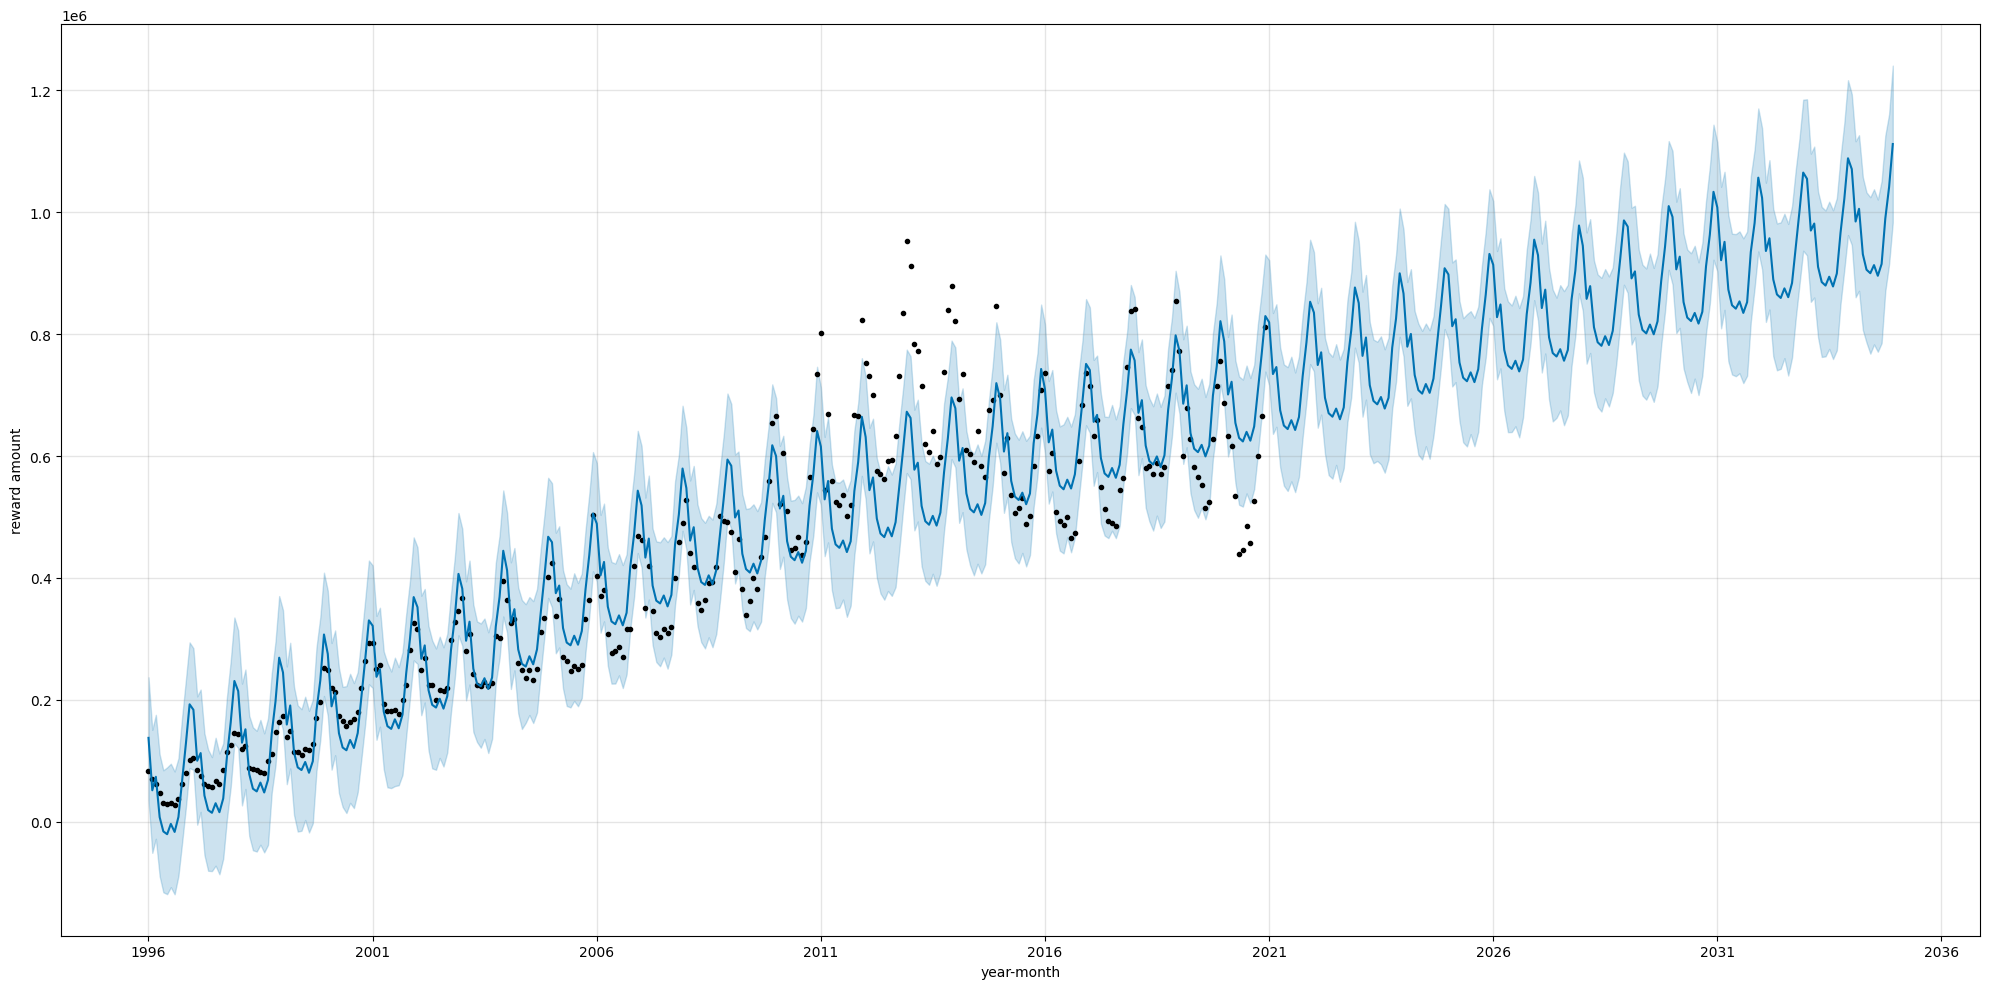

In [63]:
with open(pkl_path, 'rb') as f:
    model_san2 = pickle.load(f)    
    fcst = model_san2.predict(future)
fig = model_san2.plot(fcst, figsize=(20,10), xlabel='year-month', ylabel='reward amount')

In [67]:
import lightgbm as lgb

In [68]:
df1 = df.loc[:299]
df1['도시가스_산업용'] = df1['도시가스_산업용'].astype(int)
test = df.loc[300:]
test.rename(columns = {"누적성장율": "grownrate",'도시가스_산업용':'IND'}, inplace = True)
df1.rename(columns = {"누적성장율": "grownrate",'도시가스_산업용':'IND'}, inplace = True)
features = ['kospi_float', 'OIL_PRICE', 'GDP', 'temp_h_rcp6', 'QVA','holirate','RP']
train_x = df1[features]
train_y = df1['IND']
test_x = test[features]   

#그라디언트부스팅
lgb_dtrain = lgb.Dataset(data = train_x, label = train_y) # LightGBM 모델에 맞게 변환
lgb_param = {'max_depth': 4,
            'learning_rate': 0.05, # Step Size
            'n_estimators': 700, # Number of trees
            'objective': 'regression'} # 목적 함수 (L2 Loss)
lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain) # 학습 진행
lgb_model_predict = lgb_model.predict(test_x) # test data 예측

print(f'최소: {lgb_model_predict.min()}')
print(f'평균: {lgb_model_predict.mean()}')
print(f'최대: {lgb_model_predict.max()}')


[LightGBM] [Info] Total Bins 481
[LightGBM] [Info] Number of data: 300, number of used features: 7
[LightGBM] [Info] Start training from score 417038.806667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

<AxesSubplot: >

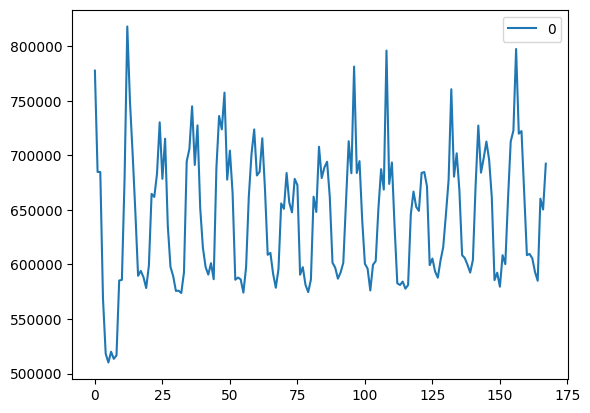

In [70]:
pd.DataFrame(lgb_model_predict).plot()

In [40]:
#pd.DataFrame(pred_gb_san).plot()

In [175]:
## 현재 파일
#print(fcst['yhat'][-168:].mean(),fcst['yhat'][-168:].min(),fcst['yhat'][-168:].max())
## kn best: 845704.3968539818 643316.3573591688 1114526.3562133969

747050.5923968008 588754.7379354903 974647.9631783558


# best 조합
sub['IND'] =y_pred.values*0.82+fcst['yhat'][-168:].values*0.18
841681.4205757922 525347.1564351048 1368964.2921524532

In [75]:
sub['IND'] =y_pred.values*0.75+fcst['yhat'][-168:].values*0.20 +lgb_model_predict*0.05   #pred_gb_san*0.1+
print(sub['IND'].mean(), sub['IND'].min(),sub['IND'].max())
# 841766.1674305244 525623.3910869778 1369269.4061498833

831789.2573976723 528934.3590618494 1326698.8739076674


<AxesSubplot: >

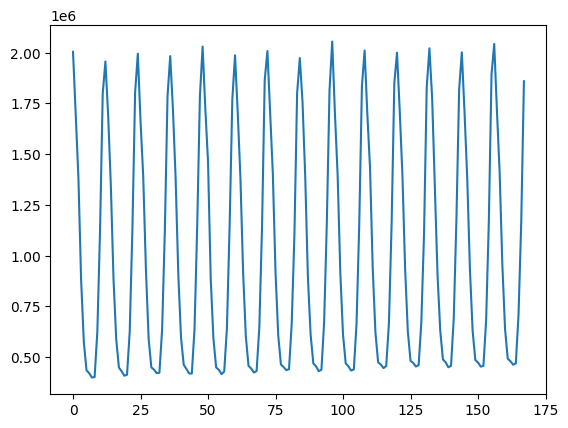

In [76]:
sub['CIVIL'].plot()

<AxesSubplot: >

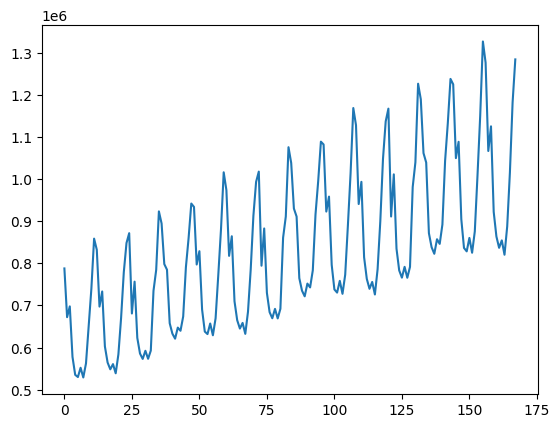

In [77]:
sub['IND'].plot()

In [78]:
print(sub['IND'].mean(), sub['IND'].min(),sub['IND'].max()) #790471.1890171387
print(sub['CIVIL'].mean(), sub['CIVIL'].min(),sub['CIVIL'].max()) #790471.1890171387

831789.2573976723 528934.3590618494 1326698.8739076674
1004116.6380119249 400282.33117678494 2054525.6299672518


# best 조합

sub = pd.read_csv('../../0_data/rawdata/submission_sample.csv')

In [79]:
##민수용 best
#compare = pd.read_csv('../../0_data/newdata/1_prophet_uni/reverse_model')
#sub['CIVIL'] = compare['CIVIL'].copy()
#print(sub['CIVIL'].mean(), sub['CIVIL'].min(),sub['CIVIL'].max())

#산업용 best
san = pd.read_csv('../../3_submit/Ann/san2.csv')
sub['IND'] = san['IND'].copy()
print(sub['IND'].mean(), sub['IND'].min(),sub['IND'].max())

<AxesSubplot: >

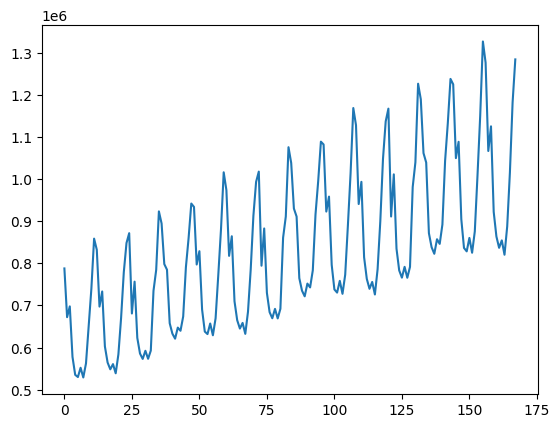

In [80]:
sub['IND'].plot()

In [81]:
sub.to_csv('~/Desktop/finalCopy/3_submit/min_prophet+es+gbfeaturetunning622_es+multifeaturetunning_gasoilrpwithkn_0.8218_b11.csv',index=False)

In [ ]:
## 끝